## **Analyse des données récupérées**

#### Membres du binôme :
- KRISNI Almehdi
- ARICHANDRA Santhos

In [135]:
# Imports
from utils import *

# Rechargement automatique des fichiers importés (vu dans l'UE de Data Science en L3)
%load_ext autoreload
%autoreload 2

# On désactive les affichages
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataframe creation and management

In [136]:
# We create the dataframe containing all the recipes collected and clear the NaN values in case
df = recipeDfMaker(10000, 100, 25000)
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13494 entries, 0 to 13495
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           13494 non-null  object 
 1   id             13494 non-null  int64  
 2   description    13494 non-null  object 
 3   picture        13494 non-null  object 
 4   servings       13494 non-null  int64  
 5   calories       13494 non-null  float64
 6   reviews        13494 non-null  int64  
 7   rating         13494 non-null  float64
 8   carbohydrates  13494 non-null  float64
 9   dietary fiber  13494 non-null  float64
 10  sugars         13494 non-null  float64
 11  fat            13494 non-null  float64
 12  saturated fat  13494 non-null  float64
 13  cholesterol    13494 non-null  float64
 14  calcium        13494 non-null  float64
 15  iron           13494 non-null  float64
 16  magnesium      13494 non-null  float64
 17  potassium      13494 non-null  float64
 18  sodium

In [137]:
# We fuse the picture data to the dataframe
picdf = pictureDataDfMaker(10000, 100, 25000)
picdf.dropna()
fuseDfPictureData(df, picdf)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13494 entries, 0 to 13495
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  13494 non-null  object 
 1   id                    13494 non-null  int64  
 2   description           13494 non-null  object 
 3   picture               13494 non-null  object 
 4   servings              13494 non-null  int64  
 5   calories              13494 non-null  float64
 6   reviews               13494 non-null  int64  
 7   rating                13494 non-null  float64
 8   carbohydrates         13494 non-null  float64
 9   dietary fiber         13494 non-null  float64
 10  sugars                13494 non-null  float64
 11  fat                   13494 non-null  float64
 12  saturated fat         13494 non-null  float64
 13  cholesterol           13494 non-null  float64
 14  calcium               13494 non-null  float64
 15  iron               

In [138]:
# We remove the pictures
picdf = removeNoPictures(df)
picdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12594 entries, 0 to 13495
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  12594 non-null  object 
 1   id                    12594 non-null  int64  
 2   description           12594 non-null  object 
 3   picture               12594 non-null  object 
 4   servings              12594 non-null  int64  
 5   calories              12594 non-null  float64
 6   reviews               12594 non-null  int64  
 7   rating                12594 non-null  float64
 8   carbohydrates         12594 non-null  float64
 9   dietary fiber         12594 non-null  float64
 10  sugars                12594 non-null  float64
 11  fat                   12594 non-null  float64
 12  saturated fat         12594 non-null  float64
 13  cholesterol           12594 non-null  float64
 14  calcium               12594 non-null  float64
 15  iron               

In [139]:
# We compute the FSA scores
computeFSAscore(df)

In [140]:
# We compute the number of ingredients per recipe
computeNumberIngredients(df)

## Vizualisation

In [141]:
# Plot parameter (style)
plt.style.use('ggplot')

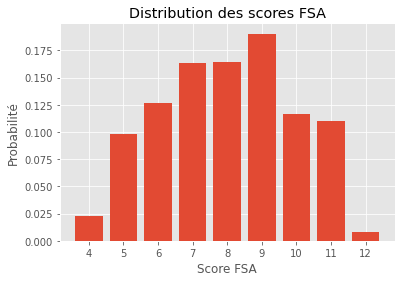

In [142]:
# We plot the FSA score distribution
labels, counts = np.unique(df["FSA_score"].tolist(), return_counts=True)
counts = [counts[i] / sum(counts) for i in range(len(counts))]
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title("Distribution des scores FSA")
plt.xlabel("Score FSA")
plt.ylabel("Probabilité")
plt.savefig('bin/visual/fsa_score_distribution.png', bbox_inches='tight')
plt.show()

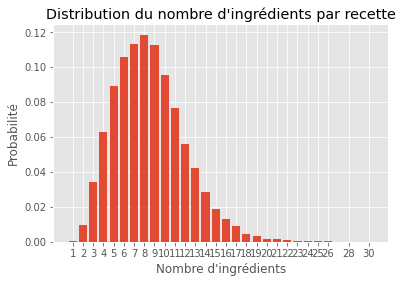

In [143]:
# We plot the distribution of the number of ingredients per recipe
labels, counts = np.unique(df["number_ingredients"].tolist(), return_counts=True)
counts = [counts[i] / sum(counts) for i in range(len(counts))]
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title("Distribution du nombre d'ingrédients par recette")
plt.xlabel("Nombre d'ingrédients")
plt.ylabel("Probabilité")
plt.savefig('bin/visual/ingredients_number_distribution.png', bbox_inches='tight')
plt.show()

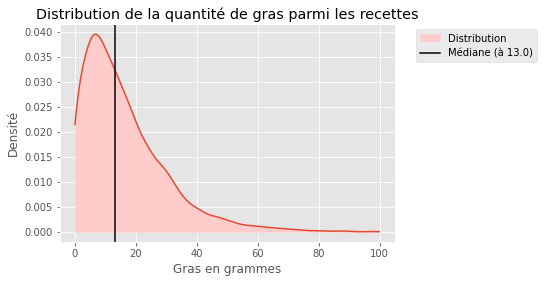

In [184]:
# Distribution of fat in recipes
fatdata = df["fat"].tolist()
medfat = np.median(fatdata)
density = gaussian_kde(fatdata)
x = np.arange(0, 100, 0.1)
plt.plot(x, density(x))
plt.fill_between(x, density(x), color='#ffcccb', label="Distribution")
plt.axvline(x=medfat, color="black", label="Médiane (à " + str(medfat) + ")")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Gras en grammes")
plt.ylabel("Densité")
plt.title("Distribution de la quantité de gras parmi les recettes")
plt.savefig('bin/visual/fat_distribution.png', bbox_inches='tight')
plt.show()

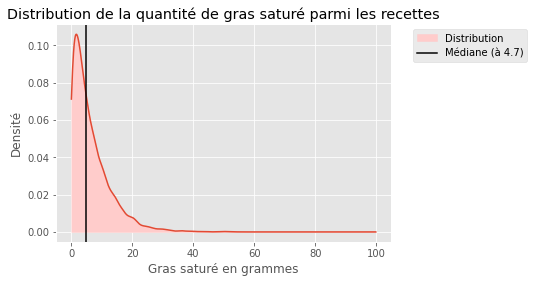

In [185]:
# Distribution of saturated fat in recipes
fatsatdata = df["saturated fat"].tolist()
medsatfat = np.median(fatsatdata)
density = gaussian_kde(fatsatdata)
x = np.arange(0, 100, 0.1)
plt.plot(x, density(x))
plt.fill_between(x, density(x), color='#ffcccb', label="Distribution")
plt.axvline(x=medsatfat, color="black", label="Médiane (à " + str(medsatfat) + ")")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Gras saturé en grammes")
plt.ylabel("Densité")
plt.title("Distribution de la quantité de gras saturé parmi les recettes")
plt.savefig('bin/visual/saturated_fat_distribution.png', bbox_inches='tight')
plt.show()

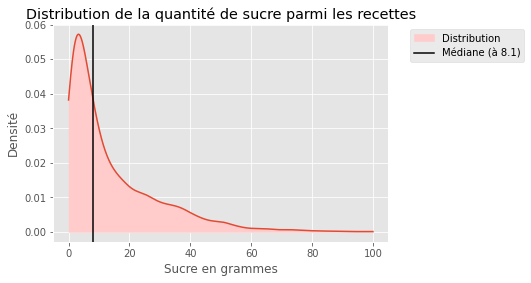

In [186]:
# Distribution of sugars in recipes
sugdata = df["sugars"].tolist()
medsug = np.median(sugdata)
density = gaussian_kde(sugdata)
x = np.arange(0, 100, 0.1)
plt.plot(x, density(x))
plt.fill_between(x, density(x), color='#ffcccb', label="Distribution")
plt.axvline(x=medsug, color="black", label="Médiane (à " + str(medsug) + ")")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Sucre en grammes")
plt.ylabel("Densité")
plt.title("Distribution de la quantité de sucre parmi les recettes")
plt.savefig('bin/visual/sugars_distribution.png', bbox_inches='tight')
plt.show()

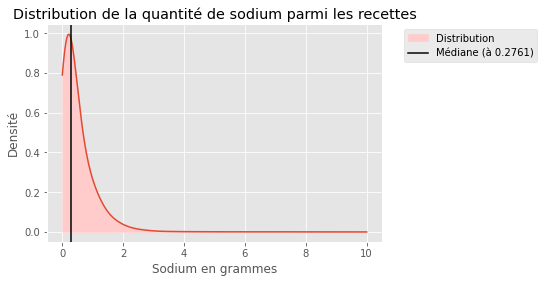

In [190]:
# Distribution of sodium in recipes
soddata = df["sodium"].tolist()
medsod = np.median(soddata)
density = gaussian_kde(soddata)
x = np.arange(0, 10, 0.001)
plt.plot(x, density(x))
plt.fill_between(x, density(x), color='#ffcccb', label="Distribution")
plt.axvline(x=medsod, color="black", label="Médiane (à " + str(medsod) + ")")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Sodium en grammes")
plt.ylabel("Densité")
plt.title("Distribution de la quantité de sodium parmi les recettes")
plt.savefig('bin/visual/sodium_distribution.png', bbox_inches='tight')
plt.show()

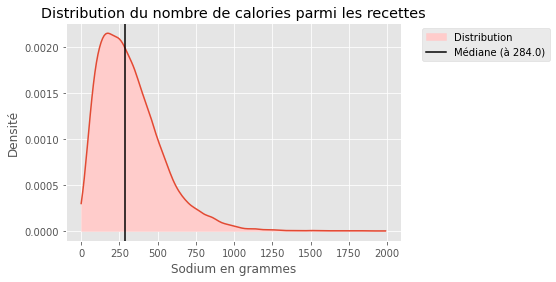

In [191]:
# Distribution of calories in recipes
caldata = df["calories"].tolist()
medcal = np.median(caldata)
density = gaussian_kde(caldata)
x = np.arange(0, 2000, 10)
plt.plot(x, density(x))
plt.fill_between(x, density(x), color='#ffcccb', label="Distribution")
plt.axvline(x=medcal, color="black", label="Médiane (à " + str(medcal) + ")")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Calories")
plt.ylabel("Densité")
plt.title("Distribution du nombre de calories parmi les recettes")
plt.savefig('bin/visual/calories_distribution.png', bbox_inches='tight')
plt.show()

In [114]:
# We find the mean cosine similarities for a sample size of 1000 recipes
# l2, l4, l6, l8 = computeSimilarityOdds(df.sample(int(1000)))

We only give the formula for the sample size = 1000. It takes approximately 30 minutes to compute the values for 1000 recipes and 2 hours for 2000 exemples. 
<br>We have copied the results into a list below in order to keep them safe.

In [115]:
# Similarities
xlabels = [0, 1000, 2000, 3000, 4000, 5000]
cos2values = [0, 0.806, 0.804, 0.809, 0.798, 0.799]
cos4values = [0, 0.525, 0.542, 0.537, 0.534, 0.535]
cos6values = [0, 0.019, 0.020, 0.019, 0.019, 0.018]
cos8values = [0, 0.0002, 0.0002, 0.0002, 0.0002, 0.0002]

sizecos2values = [0] + [int(cos2values[i] * (i * 1000)) for i in range(1, len(xlabels))]
sizecos4values = [0] + [int(cos4values[i] * (i * 1000)) for i in range(1, len(xlabels))]
sizecos6values = [0] + [int(cos6values[i] * (i * 1000)) for i in range(1, len(xlabels))]
sizecos8values = [0] + [int(cos8values[i] * (i * 1000)) for i in range(1, len(xlabels))]

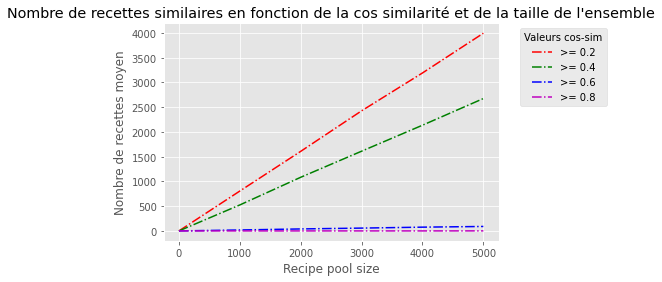

In [116]:
# Ploting the evolution of the number of similar recipes based on the size of the sample and the shared cosine similarity
plt.title("Nombre de recettes similaires en fonction de la cos similarité et de la taille de l'ensemble")
plt.plot(xlabels, sizecos2values, "r-.", label=">= 0.2")
plt.plot(xlabels, sizecos4values, "g-.", label=">= 0.4")
plt.plot(xlabels, sizecos6values, "b-.", label=">= 0.6")
plt.plot(xlabels, sizecos8values, "m-.", label=">= 0.8")
plt.xlabel("Recipe pool size")
plt.ylabel("Nombre de recettes moyen")
plt.legend(title="Valeurs cos-sim", bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('bin/visual/cossim_recipes_odds.png', bbox_inches='tight')
plt.show()

## A selection of recipe pairs

In [117]:
# We iterate on 6 different recipe and find a pair in the recipe pool
print("Recipe pairs chosen at random")
n = 0
todo = False

if todo :
    while (n < 6) :
        # We take a random id from the dataframe 
        r1 = random.choice(df["id"].tolist())

        # We now generate the list of similar recipes and pick a random id
        simRecipesId = findSimRecipes(df, r1, 0.8, mode=2)

        # We check if there are similar recipes
        if (len(simRecipesId) > 0) :
            n += 1

            # We choose a random recipe B from the list
            r2 = random.choice(simRecipesId)

            print(df.loc[df["id"] == r1]["name"].values[0], "\t-\t", df.loc[df["id"] == r2]["name"].values[0])

Recipe pairs chosen at random


## Study results

In [118]:
# Dictionnary used to convert the information choice value into strings for better comprehension
convertIndexChoice = {1 : "Picture", 2 : "Name", 3 : "Ingredients"}

### First study analysis

In [119]:
# We read the results of the first study
study1res = readResultsStudy()
study1res.head()

,recipe_A_id,recipe_B_id,recipe_choice,information_choice,expected_answer
0,15604,15811,1,1,1
1,21694,12775,1,1,1
2,21108,24932,2,2,1
3,20222,20220,1,1,2
4,23285,21741,2,2,2


In [120]:
# Number of correct answers
ans1 = [a for a in study1res["recipe_choice"].tolist()]
exp1 = [e for e in study1res["expected_answer"].tolist()]
print("Precision score in study 1 :", sum([1 for i, j in zip(ans1, exp1) if i == j]) / len(ans1))

Precision score in study 1 : 0.5367088607594936


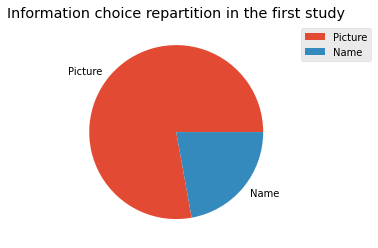

In [121]:
# We check the repartition of information choice
# We get the values
val1, counts1 = np.unique(study1res["information_choice"].tolist(), return_counts=True)
val1 = [convertIndexChoice[i] for i in val1]

# We plot the values
plt.title("Information choice repartition in the first study")
plt.pie(counts1, labels=val1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('bin/s1plot/information_repartition_study1.png', bbox_inches='tight')
plt.show()

615


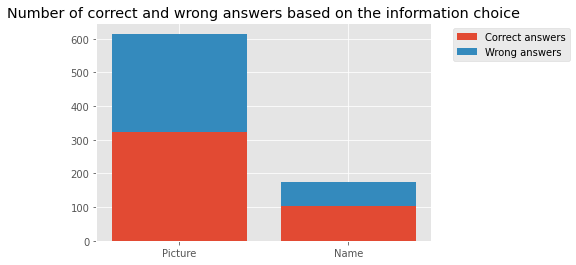

In [122]:
# Stacked bar plot to analyse the numbers of correct and false answers per information choice
anspic1 = study1res[study1res["information_choice"] == 1][["recipe_choice", "expected_answer"]]
correctpic1 = sum([1 for i, j in zip(anspic1["recipe_choice"].tolist(), anspic1["expected_answer"].tolist()) if i == j])
falsepic1 = sum([1 for i, j in zip(anspic1["recipe_choice"].tolist(), anspic1["expected_answer"].tolist()) if i != j])

ansname1 = study1res[study1res["information_choice"] == 2][["recipe_choice", "expected_answer"]]
correctname1 = sum([1 for i, j in zip(ansname1["recipe_choice"].tolist(), ansname1["expected_answer"].tolist()) if i == j])
falsename1 = sum([1 for i, j in zip(ansname1["recipe_choice"].tolist(), ansname1["expected_answer"].tolist()) if i != j])

# We create lists to group the data for the plot
ga1 = [correctpic1, correctname1]
ba1 = [falsepic1, falsename1]

print(len(study1res[study1res["information_choice"] == 1]))

# We plot the values
fig, ax = plt.subplots()
plt.title("Number of correct and wrong answers based on the information choice")
ax.bar(val1, ga1, label="Correct answers")
ax.bar(val1, ba1, label="Wrong answers", bottom=ga1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig("bin/s1plot/answer_numbers_study1.png", bbox_inches='tight')
plt.show()

### Second study analysis

In [123]:
# We read the results of the second study
study2res = readResultsStudy(True)
study2res.head()

,recipe_A_id,recipe_B_id,recipe_choice,information_choice,expected_answer
0,17195,15671,1,2,1
1,11726,11889,1,2,1
2,21487,21304,2,3,1
3,10270,10095,1,3,2
4,12532,13802,2,3,2


In [124]:
# Number of correct answers
ans2 = [a for a in study2res["recipe_choice"].tolist()]
exp2 = [e for e in study2res["expected_answer"].tolist()]
print("Precision score in study 2 :", sum([1 for i, j in zip(ans2, exp2) if i == j]) / len(ans2))

Precision score in study 2 : 0.6097560975609756


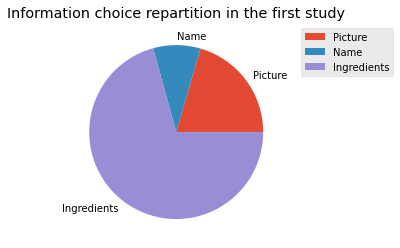

In [125]:
# We check the repartition of good answers
# We get the values
val2, counts2 = np.unique(study2res["information_choice"].tolist(), return_counts=True)
val2 = [convertIndexChoice[i] for i in val2]

# We plot the values
plt.title("Information choice repartition in the first study")
plt.pie(counts2, labels=val2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig('bin/s2plot/information_repartition_study2.png', bbox_inches='tight')
plt.show()

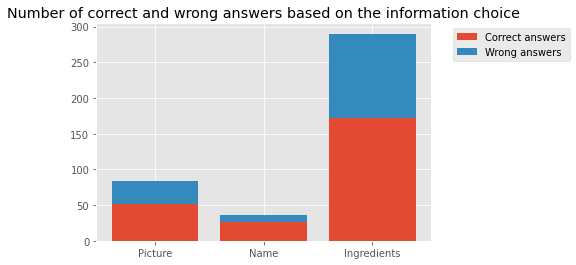

In [126]:
# Stacked bar plot to analyse the numbers of correct and false answers per information choice
anspic2 = study2res[study2res["information_choice"] == 1][["recipe_choice", "expected_answer"]]
correctpic2 = sum([1 for i, j in zip(anspic2["recipe_choice"].tolist(), anspic2["expected_answer"].tolist()) if i == j])
falsepic2 = sum([1 for i, j in zip(anspic2["recipe_choice"].tolist(), anspic2["expected_answer"].tolist()) if i != j])

ansname2 = study2res[study2res["information_choice"] == 2][["recipe_choice", "expected_answer"]]
correctname2 = sum([1 for i, j in zip(ansname2["recipe_choice"].tolist(), ansname2["expected_answer"].tolist()) if i == j])
falsename2 = sum([1 for i, j in zip(ansname2["recipe_choice"].tolist(), ansname2["expected_answer"].tolist()) if i != j])

ansing2 = study2res[study2res["information_choice"] == 3][["recipe_choice", "expected_answer"]]
correcting2 = sum([1 for i, j in zip(ansing2["recipe_choice"].tolist(), ansing2["expected_answer"].tolist()) if i == j])
falseing2 = sum([1 for i, j in zip(ansing2["recipe_choice"].tolist(), ansing2["expected_answer"].tolist()) if i != j])

# We create lists to group the data for the plot
ga2 = [correctpic2, correctname2, correcting2]
ba2 = [falsepic2, falsename2, falseing2]

# We plot the values
fig, ax = plt.subplots()
plt.title("Number of correct and wrong answers based on the information choice")
ax.bar(val2, ga2, label="Correct answers")
ax.bar(val2, ba2, label="Wrong answers", bottom=ga2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.savefig("bin/s2plot/answer_numbers_study2.png", bbox_inches='tight')
plt.show()

## Machine Learning

In [127]:
# List of features
featlist = ["picture", "name", "nutrition", "ingredients", "total"]

### **Naive Bayes**

In [128]:
# We introduce the NB classifier. The import is done in the utils file.

print("______________________________________________________________________________________\n")
for feat in ["picture", "nutrition", "name", "ingredients"] :
    dX, dY = extractFeaturesTests(df, feat)
    model = GaussianNB()
    scores = cross_val_score(model, dX, dY, cv=10, n_jobs=1, scoring='f1_macro')
    print("Naive Bayes - Feature %s\n%0.2f accuracy with a standard deviation of %0.2f" % (feat, scores.mean(), scores.std()))
    print("______________________________________________________________________________________\n")

______________________________________________________________________________________

Naive Bayes - Feature picture
0.53 accuracy with a standard deviation of 0.03
______________________________________________________________________________________

Naive Bayes - Feature nutrition
0.82 accuracy with a standard deviation of 0.02
______________________________________________________________________________________

Naive Bayes - Feature name
0.41 accuracy with a standard deviation of 0.02
______________________________________________________________________________________

Naive Bayes - Feature ingredients
0.37 accuracy with a standard deviation of 0.03
______________________________________________________________________________________



### **Random Forest**

In [129]:
print("______________________________________________________________________________________\n")
for feat in ["picture", "nutrition", "name", "ingredients"] :
    for md in [1, 5, 10] :
        dX, dY = extractFeaturesTests(df, feat)
        model = RandomForestClassifier(max_depth=md)
        scores = cross_val_score(model, dX, dY, cv=10, n_jobs=1, scoring='f1_macro')
        print("Random Forest (max depth = %d) - Feature %s\n%0.2f accuracy with a standard deviation of %0.2f\n" % (md, feat, scores.mean(), scores.std()))
    print("______________________________________________________________________________________\n")

______________________________________________________________________________________

Random Forest (max depth = 1) - Feature picture
0.48 accuracy with a standard deviation of 0.05

Random Forest (max depth = 5) - Feature picture
0.84 accuracy with a standard deviation of 0.06

Random Forest (max depth = 10) - Feature picture
0.99 accuracy with a standard deviation of 0.01

______________________________________________________________________________________

Random Forest (max depth = 1) - Feature nutrition
0.80 accuracy with a standard deviation of 0.03

Random Forest (max depth = 5) - Feature nutrition
0.98 accuracy with a standard deviation of 0.02

Random Forest (max depth = 10) - Feature nutrition
1.00 accuracy with a standard deviation of 0.00

______________________________________________________________________________________

Random Forest (max depth = 1) - Feature name
0.38 accuracy with a standard deviation of 0.02

Random Forest (max depth = 5) - Feature name
0.60 ac

### **Logistic**

In [130]:
# We introduce the Logistic Regression classifier. The import is done in the utils file.

print("______________________________________________________________________________________\n")
for feat in ["picture", "nutrition", "name", "ingredients"] :
    dX, dY = extractFeaturesTests(df, feat)
    model = LogisticRegression(random_state=0)
    scores = cross_val_score(model, dX, dY, cv=10, n_jobs=1, scoring='f1_macro')
    print("Logistic Regression - Feature %s\n%0.2f accuracy with a standard deviation of %0.2f" % (feat, scores.mean(), scores.std()))
    print("______________________________________________________________________________________\n")

______________________________________________________________________________________

Logistic Regression - Feature picture
0.54 accuracy with a standard deviation of 0.05
______________________________________________________________________________________

Logistic Regression - Feature nutrition
0.99 accuracy with a standard deviation of 0.01
______________________________________________________________________________________

Logistic Regression - Feature name
0.60 accuracy with a standard deviation of 0.03
______________________________________________________________________________________

Logistic Regression - Feature ingredients
0.62 accuracy with a standard deviation of 0.04
______________________________________________________________________________________



## More stuff

In [131]:
# Exclude string columns
dfNoStr = df.select_dtypes(exclude=['object'])
dfNoStr.head(5)

,id,servings,calories,reviews,rating,carbohydrates,dietary fiber,sugars,fat,saturated fat,...,magnesium,potassium,sodium,sharpness_picture,brightness_picture,entropy_picture,colorfulness_picture,contrast_picture,FSA_score,number_ingredients
0,10000,12,599.7,38,3.8,86.6,2.6,54.1,26.9,11.6,...,0.0392,0.1812,0.4130,9.374181,122.297989,1.274089,20.113405,1.000000,11,15
1,10001,12,357.6,13,4.3,35.5,2.0,17.2,22.6,10.8,...,0.0296,0.1525,0.1965,9.073389,108.192978,1.654356,62.595903,14.875000,9,9
2,10002,30,200.0,6,3.9,21.9,0.7,14.6,11.6,2.7,...,0.0162,0.0799,0.1273,4.301790,80.119311,1.384078,50.054033,0.975460,8,9
3,10003,24,116.3,154,4.0,10.9,0.2,2.5,7.8,4.9,...,0.0020,0.0108,0.0549,8.095743,138.466889,1.358489,70.363709,49.799999,6,5
4,10004,8,108.1,19,4.7,26.0,0.0,25.2,0.0,0.0,...,0.0015,0.0213,0.0213,7.910772,131.493567,1.488211,33.684277,1.000000,6,6
